# Model training 
En este notebook vamos a trabajar con los datos del notebook **00-Datos.ipynb** y el objetivo será entrenar  modelos sobre el set de entrenamiento obtenido para luego evaluar sus resultados.

In [1]:
### Imports Python
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

### Imports data
import os
import tarfile
import urllib.request
import pandas as pd
import pickle


In [117]:
## Importo la data
housing = pd.read_pickle("datasets/housing_4train.pkl")  

### Saco los valores que quiero predecir
housing_value = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1) # drop labels for training set


In [118]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'coast_distance'],
      dtype='object')

In [119]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'coast_distance'],
      dtype='object')

## Data Transformer

Una vez que ya vimos cómo es la estructura de nuestros datos y conocemos su comportamiento, nos dedicamos a transformarlos para que los algoritmos de ML que utilicemos funcionen mejor. En el caso de las variables categóricas esto consiste en generar un _ordinal enconder_ o un _OneHotEncoder_. En el caso de las variables numéricas vamos a querer que éstas tomen valores del mismo orden de magnitud y que tengan el mismo dominio. Para ésto transformamos los datos con un escaleo, en general un escaleo _normal_.

### Numéricos

In [120]:
from sklearn.preprocessing import StandardScaler

### transformacion NORMAL de  los datos
housing_num = housing.drop(["ocean_proximity"],axis = 1) ### Trabajaemos con los datos numericos, dropeamos los categoricos

scaler = StandardScaler() ## Instancia de clase StandardScaler
scaler.fit(housing_num) ### el scaler necesita saber el valor medio y desvío de cada variable, el método fit los obtiene

housing_num_tr = scaler.transform(housing_num)

In [121]:
housing_num_tr

array([[ 1.52346202, -0.85071881, -0.60284716, ...,  0.22276313,
        -0.14595515,  1.1606629 ],
       [-1.6764423 ,  1.33721733,  1.37738127, ...,  0.04172816,
        -0.12797078, -0.23889427],
       [-1.45214994,  0.93048561,  0.18924421, ..., -0.23305409,
        -0.10042372, -0.79673663],
       ...,
       [-1.10325072,  0.78555822, -1.79098421, ..., -0.28272304,
         0.10752716, -0.40173583],
       [ 0.67115105, -0.77591757,  0.50608076, ...,  2.56431376,
         0.20534167, -0.52716784],
       [-1.14810919,  0.77620806, -0.99889284, ...,  1.11097884,
        -0.0885504 , -0.52496728]])

El resultado es un numpy array con los valores normalizados.

### Cat

In [40]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_tr = housing_cat_1hot.toarray()


In [86]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

## Tuti junti

In [126]:
### juntamos los resultadsos numericos y los categoricos
data_full_prepared = np.concatenate((housing_num_tr, housing_cat_tr), axis=1)
features = list(housing_num.columns) + list(cat_encoder.categories_[0])

In [127]:
len(features)

17

# Modelos

## Regresión Lineal

En la regresión lineal voy a sacar los Features caegóricos porque meten mucho ruido.

In [128]:
from sklearn.linear_model import LinearRegression

X = housing_num_tr
Y = housing_value
lin_reg = LinearRegression() ### instancia de la clase
lin_reg.fit(X, Y) ### Fit
print("Los coeficientes de la regresión son:\n",lin_reg.coef_,lin_reg.intercept_)


Los coeficientes de la regresión son:
 [-4.11708251e+17 -4.82831317e+17  1.47025558e+04  4.55785772e+03
  4.01214005e+03 -4.46650814e+04  4.12273599e+04  7.98864555e+04
  8.12844209e+03  1.81511159e+04  1.79650583e+03  1.86503936e+17] 208553.45416812963


### Ploteo algunos de los resultados

In [129]:
y_pred = lin_reg.predict(X)

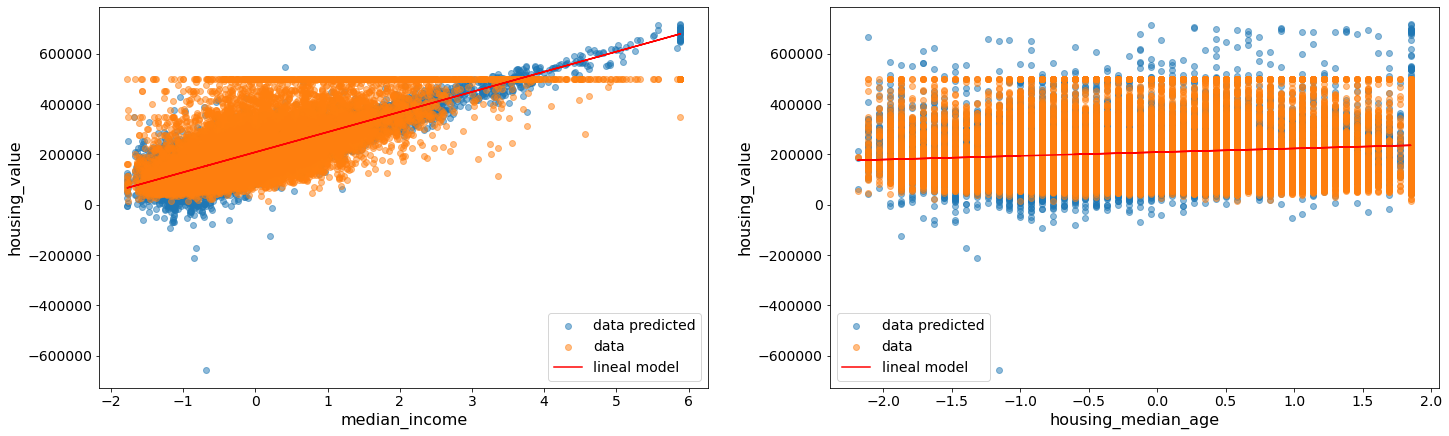

In [130]:
fig, ax = plt.subplots(figsize = (24,7))
plt.subplot(121)
idx = 7
#y_pred =[y for _,y in sorted(zip(X.T[idx],y_pred))]
plt.scatter(X.T[idx],y_pred,alpha =0.5,label = "data predicted")
plt.scatter(X.T[idx],Y,alpha =0.5,label = "data")

plt.plot(X.T[idx],lin_reg.coef_[idx]*X.T[idx] + lin_reg.intercept_,color = "red",label = "lineal model")
plt.xlabel(features[idx],fontsize= 16)
plt.ylabel("housing_value",fontsize = 16)
plt.yticks(fontsize = 14);
plt.xticks(fontsize = 14);
plt.legend(fontsize = 14)

plt.subplot(122)
idx = 2
#y_pred =[y for _,y in sorted(zip(X.T[idx],y_pred))]
plt.scatter(X.T[idx],y_pred,alpha =0.5,label = "data predicted")
plt.scatter(X.T[idx],Y,alpha =0.5,label = "data")

plt.plot(X.T[idx],lin_reg.coef_[idx]*X.T[idx] + lin_reg.intercept_,color = "red",label = "lineal model")
plt.xlabel(features[idx],fontsize= 16)
plt.ylabel("housing_value",fontsize = 16)
plt.yticks(fontsize = 14);
plt.xticks(fontsize = 14);
plt.legend(fontsize = 14)

## DecisionTreeRegressor

Los árboles de decisión son capaces de definir un valor de la variable dependiente **Y**, para diferentes interavalos y condiciones de las variables independientes **X**. En este sentido este algoritmo es capaz de hacer una regresión.

In [131]:
from sklearn.tree import DecisionTreeRegressor
X =  data_full_prepared
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_full_prepared, housing_value)


DecisionTreeRegressor(random_state=42)

In [132]:
y_pred = tree_reg.predict(data_full_prepared)

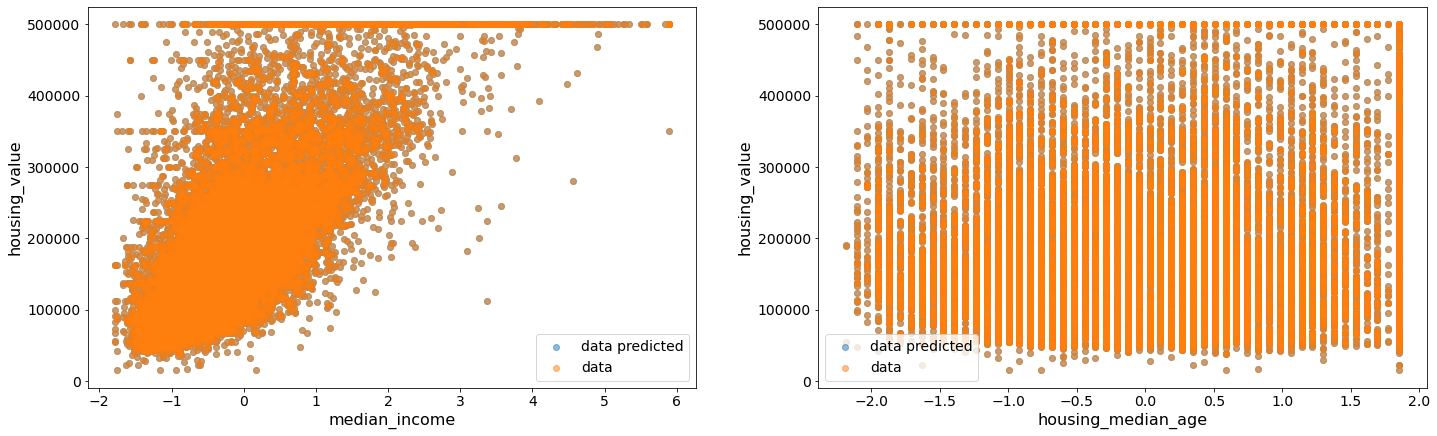

In [133]:
fig, ax = plt.subplots(figsize = (24,7))
plt.subplot(121)
idx = 7
#y_pred =[y for _,y in sorted(zip(X.T[idx],y_pred))]
plt.scatter(X.T[idx],y_pred,alpha =0.5,label = "data predicted")
plt.scatter(X.T[idx],Y,alpha =0.5,label = "data")

plt.xlabel(features[idx],fontsize= 16)
plt.ylabel("housing_value",fontsize = 16)
plt.yticks(fontsize = 14);
plt.xticks(fontsize = 14);
plt.legend(fontsize = 14)

plt.subplot(122)
idx = 2
#y_pred =[y for _,y in sorted(zip(X.T[idx],y_pred))]
plt.scatter(X.T[idx],y_pred,alpha =0.5,label = "data predicted")
plt.scatter(X.T[idx],Y,alpha =0.5,label = "data")

plt.xlabel(features[idx],fontsize= 16)
plt.ylabel("housing_value",fontsize = 16)
plt.yticks(fontsize = 14);
plt.xticks(fontsize = 14);
plt.legend(fontsize = 14)

**LOS PUNTOS PREDICHOS SON IGUALES A LOS ORIGINALES**, ALGO HUELE MAL.

## Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(data_full_prepared, housing_value)
y_pred = forest_reg.predict(data_full_prepared)

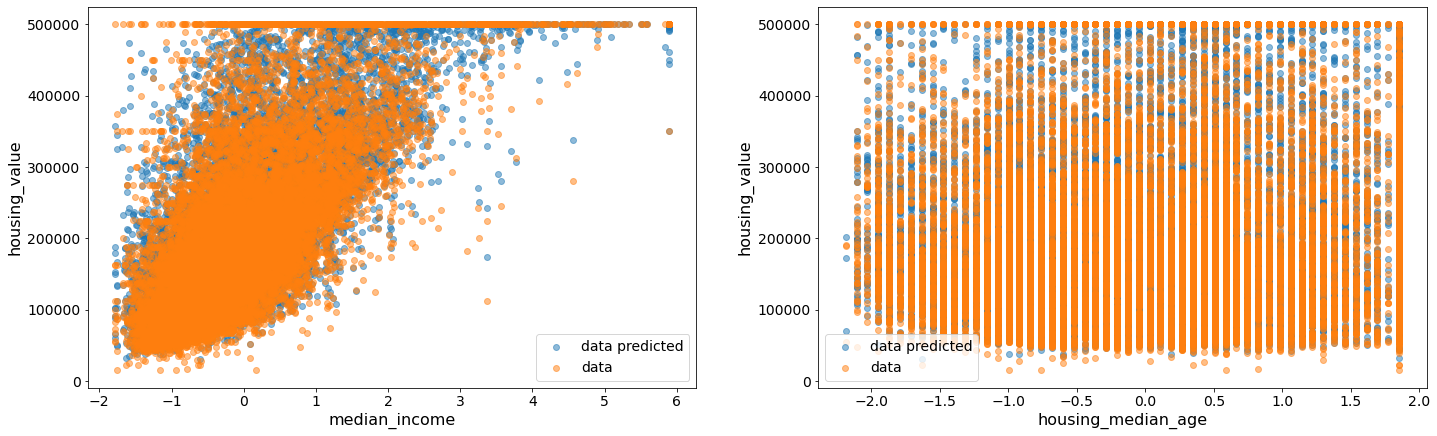

In [135]:
fig, ax = plt.subplots(figsize = (24,7))
plt.subplot(121)
idx = 7
#y_pred =[y for _,y in sorted(zip(X.T[idx],y_pred))]
plt.scatter(X.T[idx],y_pred,alpha =0.5,label = "data predicted")
plt.scatter(X.T[idx],Y,alpha =0.5,label = "data")

plt.xlabel(features[idx],fontsize= 16)
plt.ylabel("housing_value",fontsize = 16)
plt.yticks(fontsize = 14);
plt.xticks(fontsize = 14);
plt.legend(fontsize = 14)

plt.subplot(122)
idx = 2
#y_pred =[y for _,y in sorted(zip(X.T[idx],y_pred))]
plt.scatter(X.T[idx],y_pred,alpha =0.5,label = "data predicted")
plt.scatter(X.T[idx],Y,alpha =0.5,label = "data")

plt.xlabel(features[idx],fontsize= 16)
plt.ylabel("housing_value",fontsize = 16)
plt.yticks(fontsize = 14);
plt.xticks(fontsize = 14);
plt.legend(fontsize = 14)

# Métricas en una regresión

Nos interesa evaluar el desempeño de nuestro modelo en predecir los valores de una variable **Y** como función de las variables independientes **X** que definimos. Para esto existen dos funciones clásicas: 
* la raiz del error cuadrático medio (_RMSE_)
* el error absoluto medio (_MAE_)

In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Linear 
X = housing_num_tr

housing_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(housing_value, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_value, housing_predictions)

print("El MSE para el modelo lineal es: ",lin_rmse)
print("El MAE es el modelo lineal es: ",lin_mae)

El MSE para el modelo lineal es:  68308.44244443094
El MAE es el modelo lineal es:  49746.93476089431


In [137]:
### Desicion Trees

housing_predictions = tree_reg.predict(data_full_prepared)
tree_mse = mean_squared_error(housing_value, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
lin_mae = mean_absolute_error(housing_value, housing_predictions)

print("El MSE para el TreeRegressor es: ",tree_rmse)
print("El MAE para el TreeRegressor es: ",tree_rmse)
print("Efectivamente acá hay un overfitting, que ya habíamos visto en los plots.")

El MSE para el TreeRegressor es:  0.0
El MAE para el TreeRegressor es:  0.0
Efectivamente acá hay un overfitting, que ya habíamos visto en los plots.


In [138]:
### Random Forest 
housing_predictions = forest_reg.predict(data_full_prepared)
forest_mse = mean_squared_error(housing_value, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(housing_value, housing_predictions)

print("El MSE para el RandomForest es: ",forest_rmse)
print("El MAE para el TreeRegressor es: ",forest_mae)

El MSE para el RandomForest es:  20860.648788725863
El MAE para el TreeRegressor es:  12759.115637112403


# CV

Para evaluar el desempeño de estos modelos sin utilizar nuestro set de test podemos hacer una nueva división de la partición de training. De la misma manera que antes, separamos una porción de los datos y luego entrenamos con el resto. Lo usual es dividir a los datos en 5 o 10 subconjuntos excluyentes entre sí y separar uno como el nuevo test. Con el resultado del entrenamiento aplicamos el ajuste a los datos separados y evaluamos el modelo con una función de score, por ej MSE. 
Para ver que los resultados no dependen de la partición utilizada volvemos a hacer este procedimiento utilizando los mismos 5 o 10 subconjuntos que habíamos definido, pero ahora elejimos otro para test. Haciendo esto para cada uno de los subconjunots tendremos 5, o 10, evaluaciones del modelo con su score.


In [139]:
from sklearn.model_selection import cross_val_score

### definamos una función para presentar los resultados 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

## CV Linear

In [140]:
housing_predictions = lin_reg.predict(X)
lin_scores = cross_val_score(lin_reg, X, housing_value, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68227.12376799 68209.33587427 66847.87893934 66422.372953
 68986.3576477  69487.99195821 66840.99041933 68319.59799772
 70887.36920495 72597.36350431]
Mean: 68682.63822668235
Standard deviation: 1826.3862392259534


## CV Trees

In [141]:
housing_predictions = tree_reg.predict(data_full_prepared)
scores = cross_val_score(tree_reg, data_full_prepared, housing_value,scoring="neg_mean_squared_error", cv=10) ### hacemos una particion de 10
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [67889.58277011 68242.37822116 67134.53460446 64684.80958803
 66704.88254322 67884.52927317 66068.89122945 69138.75341063
 70440.7202457  69908.88071241]
Mean: 67809.7962598345
Standard deviation: 1666.320088667002


## CV Forest

In [142]:
housing_predictions = forest_reg.predict(data_full_prepared)
scores = cross_val_score(forest_reg , data_full_prepared, housing_value,scoring="neg_mean_squared_error", cv=10) ### hacemos una particion de 10
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [49175.57736419 48711.2890963  48263.27358156 48604.83104301
 47899.82520902 50128.58600925 47584.3991515  50553.91595828
 49953.16666969 52598.25695676]
Mean: 49347.31210395527
Standard deviation: 1427.0774361292595


## CONCLUSIONES

Del CV que realizamos sobre los tres algoritmos que propusimos resulta que el más prometedor es el RandomForest, dado que el valor medio de su error es sistemáticament más chico que el de la regresión lineal y los árboles de decisión. Más aún, tiene menos dispersión, con lo que podemos inferir que el ajuste es similar para cada "fold" (partición) del cross validation. 

# Fine Tuning

El resultado anterior nos dio como mejor candidato a los RandomForest como algoritmo para hacer nuestro ajuste. Tomando a éste como el algoritmo definitivo, podemos explorar los parámetros que definen a este algoritmo y ver si hay alguna combinación de ellos que mejoran aún más nuestro score. A los parámetros que definen al algoritmo se los suele llamar _hyperparameters_ para diferenciarlos de los otros parámetros ajustados al implementar un algoritmo. En otras palabras, los hiperparámetros son variables estructurales del algoritmo que definen de antemano cómo se va a hacer el fitteo de los datos. 

## GRIDSEARCH CV

El primer acercamiento a encontrar el mejor conjunto de hiperparámetros consiste en definir una grilla de valores a evaluar y comparar los scores medios del 10-fold CV hasta encontrar el mejor.

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_full_prepared, housing_value)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

### Resultados

In [144]:
print("Los mejores parámetros son:",grid_search.best_params_)

Los mejores parámetros son: {'max_features': 6, 'n_estimators': 30}


In [145]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

### Veamos los resultados de cada combinación de Hiperparámetros

In [146]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

60333.734011685374 {'max_features': 2, 'n_estimators': 3}
51849.99196480834 {'max_features': 2, 'n_estimators': 10}
49639.82010390326 {'max_features': 2, 'n_estimators': 30}
56828.41465932191 {'max_features': 4, 'n_estimators': 3}
50035.700074784625 {'max_features': 4, 'n_estimators': 10}
47494.216582530025 {'max_features': 4, 'n_estimators': 30}
55932.862153719885 {'max_features': 6, 'n_estimators': 3}
49211.355260569726 {'max_features': 6, 'n_estimators': 10}
47148.39185281023 {'max_features': 6, 'n_estimators': 30}
55192.579105109 {'max_features': 8, 'n_estimators': 3}
49146.30913888329 {'max_features': 8, 'n_estimators': 10}
47173.988422115646 {'max_features': 8, 'n_estimators': 30}
58905.04484659867 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
51137.815291167055 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
56115.93020809333 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
49144.632877678945 {'bootstrap': False, 'max_features': 3, 'n_estimator

## RANDOM SEARCH CV

En este caso en lugar de definir una grilla, exploramos muestreos de los hiperparámetros en alguna distribución.

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_full_prepared, housing_value)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8b9f2dbed0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8b9f2db510>},
                   random_state=42, scoring='neg_mean_squared_error')

(OJO Tarda 2 minutos)

In [148]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

46120.747514598566 {'max_features': 7, 'n_estimators': 180}
48166.88705881503 {'max_features': 5, 'n_estimators': 15}
47376.49924421196 {'max_features': 3, 'n_estimators': 72}
47618.51519757768 {'max_features': 5, 'n_estimators': 21}
46261.21548717165 {'max_features': 7, 'n_estimators': 122}
47334.40525759658 {'max_features': 3, 'n_estimators': 75}
47223.45890530774 {'max_features': 3, 'n_estimators': 88}
46138.271471165936 {'max_features': 5, 'n_estimators': 100}
47021.90379952921 {'max_features': 3, 'n_estimators': 150}
60283.47713119791 {'max_features': 5, 'n_estimators': 2}


In [149]:
print(rnd_search.best_estimator_)

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)


## Feature importances

En el caso de Desicion Trees o Random Forest, existe una métrica sobre nuestros features que determina cuáles son los más importantes en definir una categoría en el caso de clasificación o un valor de la variable dependiente en el caso de una regresión. Veamos cómo se rankean los Features en nuestro caso:

In [150]:
feature_importances = grid_search.best_estimator_.feature_importances_

features = list(housing_num.columns) + list(cat_encoder.categories_[0])

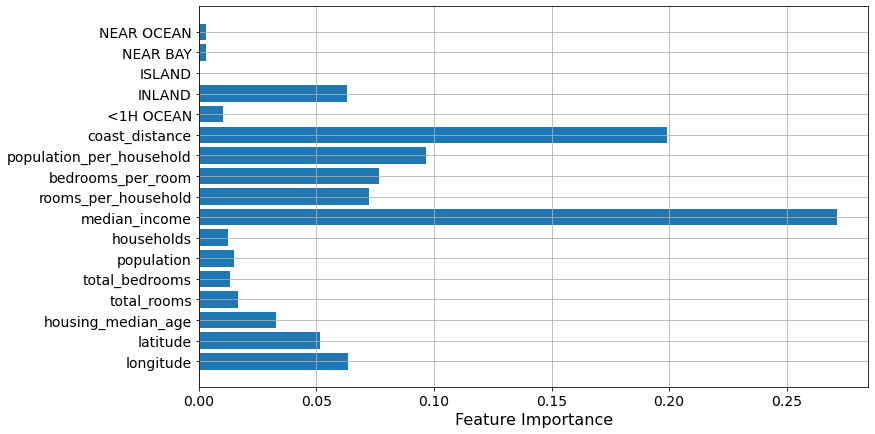

In [151]:
fig, ax = plt.subplots(figsize = (12,7))

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(features, feature_importances, align='center')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
ax.set_xlabel('Feature Importance',fontsize = 16)
ax.grid()
#ax.set_title('How fast do you want to go today?')
#ax.set_ticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)

#plt.show()

# Modelo final y evaluación en TEST

In [70]:
### Defino el modelo final como el mejor entre grid y rnd
final_model = rnd_search.best_estimator_


In [152]:
housing_test = pd.read_pickle("datasets/housing_test.pkl")
X_test = housing_test.drop("median_house_value", axis=1)
Y_test = housing_test["median_house_value"].copy()

## Hago las nuevas variables

X_test["rooms_per_household"] = X_test["total_rooms"]/X_test["households"]
X_test["bedrooms_per_room"] = X_test["total_bedrooms"]/X_test["total_rooms"]
X_test["population_per_household"]=X_test["population"]/X_test["households"]


### datos para la distancia.
p0 = (-124.55,38)
p1 = (-118.5, 32.5)
m = (p1[1]-p0[1])/(p1[0]-p0[0])
b = p0[1]-m*p0[0]
X_test["coast_distance"] =  abs(m*X_test["longitude"] - X_test["latitude"] + b)/np.sqrt(m**2+1)


### Relleno los NANS con medias

median_totbed = X_test["total_bedrooms"].median()
median_bedroom = X_test["bedrooms_per_room"].median()

### 

X_test["total_bedrooms"].fillna(median_totbed, inplace=True)
X_test["bedrooms_per_room"].fillna(median_bedroom, inplace=True)


In [153]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'coast_distance'],
      dtype='object')

In [154]:
### transformacion NORMAL de  los X
test_num = X_test.drop(["ocean_proximity"],axis = 1) ### Trabajaemos con los datos numericos, dropeamos los categoricos
scaler = StandardScaler() ## Instancia de clase StandardScaler
scaler.fit(test_num) ### el scaler necesita saber el valor medio y desvio de cada variable, el método fit los obtiene
test_num_tr = scaler.transform(test_num)

test_cat = X_test[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
test_cat_1hot = cat_encoder.fit_transform(test_cat)
test_cat_tr = test_cat_1hot.toarray()

In [155]:
### juntamos los resultadsos numericos y los categoricos
data_test_prepared = np.concatenate((test_num_tr, test_cat_tr), axis=1)

In [156]:

### tran

final_predictions = final_model.predict(data_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [160]:
final_rmse

52130.3921390752

**ESTE ES EL ERROR FINAL DE NUESTRO MODELO.**

# Exporto el modelo para producción

In [162]:
with open("final_model.p","wb") as f:
    pickle.dump(final_model,f)